<a href="https://colab.research.google.com/github/Kunal02880/Qunatum-phenomeno-/blob/main/QP_Probing_dressed_states_mysolution_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from qutip import *

In [ ]:
# ------ Probing dressed states --------
# The presence of a strong interaction field can introduce the presence of new
# Hamiltonian states known as dressed states. The presence of dressed states can be
# probed by performing spectroscopy to other state with a weak field

# Two lasers illuminate a three-level system to drive the following transitions
# - 0 <-> 1 , weak laser (Rabi frequecy Omega10 = 0.05 MHz, which inlcudes the factor of 2 pi).
# - 0 <-> 2 , strong laser, variable Rabi frequecy Omega20

# The lasers illuminate the sample simultaneously with constant power for Delta_t = 40 μs.
# You are interested in performing spectroscopy on the 0 <-> 1 transition, while the second laser
# driving the 0 <-> 2 transition is perturbing the system on resonance.
# The goal is to simulate a few spectroscopy lines: the excited state population of state 1 as
# a function of the laser detuning from the 0 <-> 1 transition. Each spectrum will correspond to a different
# strength of the "perturbing" drive. You will see the central line split into two lines corresponding
# to the dressed states.

# 1.0 - 5pt - Write a function that returns the Hamiltonian of the system.
#             Test the function with a "print" statement
# 1.1 - 5pt - Evolve the states for Delta_t with the laser 0 <-> 1 being resonant.
#            Plot the population of the three states over time. Use Omega20 = 0.5 MHz.
# 1.2 - 7pt - Assume Omega20 = 0.5 MHz. Plot of the final spectrum: population of state 1 after 40 us
#             of time evolution as a function of the detuning Delta01.
#             Sample the interval Delta01 between -1 MHz and 1 MHz around the resonant frequency.
# 1.2* - 3pt - Plot togheter the spectra for the different Omega20. Use the following values for Omega20:
#             0 MHz, 0.15 MHz, 0.5 MHz, and 1 MHz
# 1.3 - 5pt - Add to the plot of 1.2 vertical lines corresponding to the energies of the dressed states.
#             Evaluate those energies by
#                - excluding state 1
#                - write the Hamiltonian with only states 0 and 2
#                - calculate the eigenenergies of this Hamiltonian



In [ ]:
#------------------------------
# 1.0 - 5pt - Write a function that returns the Hamiltonian of the system
#             Test the function with a "print" statement
#------------------------------
# def Ham(Omega01,Omega20,delta1,delta2):
#     H_0 = Qobj([[0,Omega01,Omega20],[Omega01,0,0],[Omega20,0,0]])
#     H_int = Qobj([[0,0,0],[0,delta1,0],[0,0,delta2]])
#     H= H_0+H_int
#     return H
# Ham(1,2,3,4)
def Ham(Omega01, Omega20, delta1, delta2):
    H_0 = Qobj([[0, Omega01/2, Omega20/2],
                [Omega01/2, 0, 0],
                [Omega20/2, 0, 0]])
    H_int = Qobj([[0, 0, 0],
                  [0, delta1, 0],
                  [0, 0, delta2]])
    H = H_0 + H_int
    return H


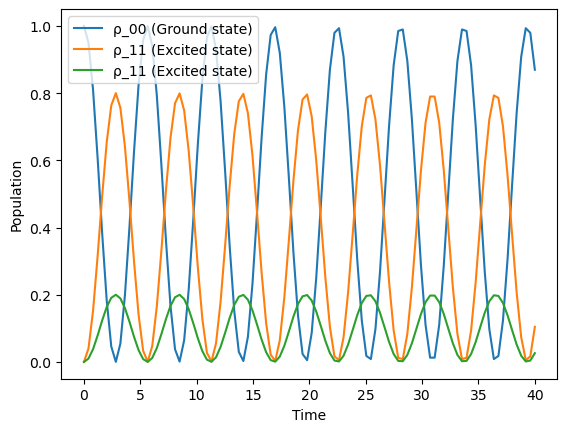

In [ ]:
#------------------------------
# 1.1 - 5pt - Evolve the states for Delta_t with the laser 0 <-> 1 being resonant.
#            Plot the population of the three states over time. Use Omega20 = 0.5 MHz.
#------------------------------
Omega01 = 1
Omega20 = 0.5
delta1 = 0
delta2 = 0
t = np.linspace(0,40,100)
e_ops= [fock_dm(3,0),fock_dm(3,1),fock_dm(3,2)]
results = sesolve(Ham(Omega01,Omega20,delta1,delta2),fock(3,0),t,e_ops)
fig, ax = plt.subplots()
ax.plot(t, results.expect[0], label="ρ_00 (Ground state)")
ax.plot(t, results.expect[1], label="ρ_11 (Excited state)")
ax.plot(t, results.expect[2], label="ρ_11 (Excited state)")

ax.set_xlabel("Time")
ax.set_ylabel("Population")
ax.legend()
plt.show()

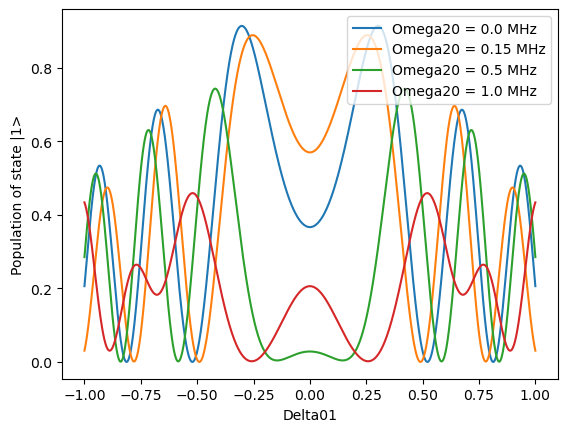

In [ ]:
#----------------------------------
# 1.2 - 7pt - Assume Omega20 = 0.5 MHz. Plot of the final spectrum: population of state 1 after 40 us
#             of time evolution as a function of the detuning Delta01.
#             Sample the interval Delta01 between -1 MHz and 1 MHz around the resonant frequency.
# 1.2* - 3pt - Plot togheter the spectra for the different Omega20. Use the following values for Omega20:
#             0 MHz, 0.15 MHz, 0.5 MHz, and 1 MHz
# #----------------------------------
# Omega20 = 0.5
# t = np.linspace(1,40,100)
# delta_arr = np.linspace(-1,1,201)
# results = []
# for delta in delta_arr:
#     result = sesolve(Ham(1,Omega20,delta,delta2),fock(3,0),t,e_ops)
#     results.append(result)
# expected_value = [result.expect[1][-1] for result in results]

# fig, ax = plt.subplots()
# ax.plot(delta_arr,expected_value)
# ax.set_xlabel('Delta01')  # Changed x-axis label to Delta01
# ax.set_ylabel('population')
# Omega20_arr = np.array([0,0.15,0.5,1])
# rho = []
# for Omega in Omega20_arr:
#     for delta in delta_arr:
#         result = sesolve(Ham(1,Omega20,delta,delta2),fock(3,0),t,e_ops)
#         rho.append(result.expect[0][-1])
#     fig, ax = plt.subplots()
#     ax.plot(delta_arr,rho)
# #expected_value = [result.expect[1][-1] for result in results]
# #fig, ax = plt.subplots()
# #ax.plot(delta_arr,rho)
# ax.set_xlabel('Delta01')  # Changed x-axis label to Delta01
# ax.set_ylabel('population')
Omega20_arr = np.array([0, 0.15, 0.5, 1])
t = np.linspace(1, 40, 100)
delta_arr = np.linspace(-1, 1, 2000)

fig, ax = plt.subplots()

for Omega in Omega20_arr:
    rho = []  # Reset rho for each Omega20
    for delta in delta_arr:
        result = sesolve(Ham(1, Omega, delta, delta2), fock(3, 0), t, e_ops=[basis(3, 1) * basis(3, 1).dag()])
        rho.append(result.expect[0][-1])  # Expectation value of state |1>

    ax.plot(delta_arr, rho, label=f"Omega20 = {Omega} MHz")

ax.set_xlabel("Delta01")
ax.set_ylabel("Population of state |1>")
ax.legend()
plt.show()


In [ ]:
#------------------------------------------------------
# 1.3 - 5pt - Add to the plot of 1.2 vertical lines corresponding to the energies of the dressed states.
#             Evaluate those energies by
#                - excluding state 1
#                - write the Hamiltonian with only states 0 and 2
#                - calculate the eigenenergies of this Hamiltonian
# -----------------------------------------------------
def Ham_2level(Omega,delta):
    H0 = Qobj([[0,Omega/2],[Omega/2,0]])
    H_int = Qobj([[0,0],[0,delta]])
    H = H0+H_int
    return H
Omega = 1
delta = 0.2
t = np.linspace(1,40,100)
psi = fock(2,0)
e_ops = [fock_dm(2,0),fock_dm(2,1)]
Delta_arr = np.linspace(-1,1,201)
results = []
dressed_states = []
for delta in Delta_arr:
    result = sesolve(Ham_2level(Omega,delta),psi,t,e_ops)
    results.append(result.expect[0][-1])
    E1 = (delta/2)-(np.sqrt((delta**2+Omega**2)/2))
    E2 = (delta/2)+(np.sqrt((delta**2+Omega**2)/2))
    dressed_states.append((E1,E2))

ax.plot(Delta_arr, results)
ax.set_xlabel("Delta01")
ax.set_ylabel("Population of state |1>")
ax.legend()
plt.show()


In [ ]:
def Ham(Omega,delta):
    H0 = Qobj([[0,1/2],[Omega/2,0]])
    H_int = Qobj([[0,0],[0,delta]])
    H = H0+H_int
    return H
for Omega in Omega20_arr:
    rho = []
    dressed_energies = []  # Store dressed state energies
    for delta in delta_arr:
        result = sesolve(Ham(Omega, delta), fock(2, 0), t, e_ops=[basis(2, 0) * basis(2, 1).dag()])
        rho.append(result.expect[0][-1])

        # Compute dressed state energies
        E1 = delta / 2 + np.sqrt(delta**2 + Omega**2) / 2
        E2 = delta / 2 - np.sqrt(delta**2 + Omega**2) / 2
        dressed_energies.append((E1, E2))

    ax.plot(delta_arr, rho, label=f"Omega20 = {Omega} MHz")

    # Add vertical lines for dressed state energies
    for E1, E2 in dressed_energies:
        ax.axvline(E1, color='gray', linestyle='--', alpha=0.5)
        ax.axvline(E2, color='gray', linestyle='--', alpha=0.5)

ax.set_xlabel("Delta01")
ax.set_ylabel("Population of state |1>")
ax.legend()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


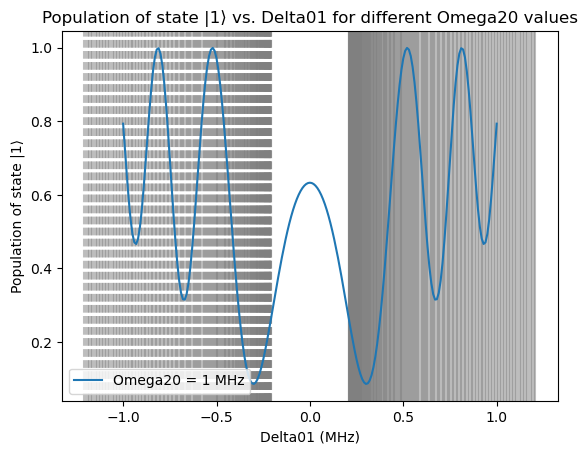

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Define Hamiltonian
def Hamil_2state(Delta02, Omega20):
    H0 = Qobj([[0, 0], [0, Delta02]])  # Correct matrix format
    Hint = Qobj([[0, Omega20/2], [Omega20/2, 0]])  # Correct interaction term
    return H0 + Hint

# Parameters
Delta02 = 0.2
Omega20 = 1
delta_arr = np.linspace(-1, 1, 201)
t = np.linspace(1, 40, 100)  # Time evolution
e_ops = [fock_dm(2,0), fock_dm(2,1)]

# Initialize plot
fig, ax = plt.subplots()

# Solve for populations
results = []
dressed_energy = []

for delta in delta_arr:
    result = sesolve(Hamil_2state(delta, Omega20), fock(2, 0), t, e_ops)
    results.append(result.expect[0][-1])

    # Compute dressed state energies
    E1 = delta / 2 + np.sqrt(delta**2 + Omega20**2) / 2
    E2 = delta / 2 - np.sqrt(delta**2 + Omega20**2) / 2
    dressed_energy.append((E1, E2))

# Add vertical lines for dressed energies
for E1, E2 in dressed_energy:
    ax.axvline(E1, color='gray', linestyle='-', alpha=0.5)
    ax.axvline(E2, color='gray', linestyle='--', alpha=0.5)

# Plot results
ax.plot(delta_arr, results, label=f"Omega20 = {Omega20} MHz")
ax.set_xlabel('Delta01 (MHz)')
ax.set_ylabel('Population of state |1⟩')
ax.set_title('Population of state |1⟩ vs. Delta01 for different Omega20 values')
ax.legend()
plt.show()


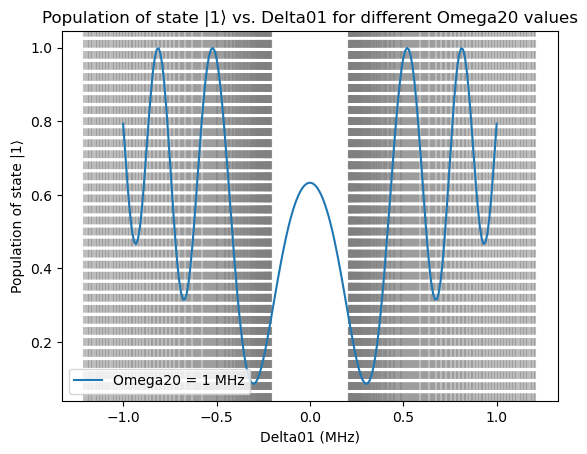

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Define the 2-state Hamiltonian
def Hamil_2state(Delta02, Omega20):
    H0 = Qobj([[0, 0], [0, Delta02]])  # Corrected Hamiltonian matrix
    Hint = Qobj([[0, Omega20/2], [Omega20/2, 0]])  # Corrected interaction term
    return H0 + Hint

# Parameters
Delta02 = 0.2
Omega20 = 1
delta_arr = np.linspace(-1, 1, 201)
t = np.linspace(1, 40, 100)  # Time evolution
e_ops = [fock_dm(2,0), fock_dm(2,1)]

# Initialize plot
fig, ax = plt.subplots()

# Solve for populations
results = []
dressed_energy = []

for delta in delta_arr:
    # Solve for time evolution
    result = sesolve(Hamil_2state(delta, Omega20), fock(2, 0), t, e_ops)
    results.append(result.expect[0][-1])

    # Compute dressed state energies from eigenvalues of Hamiltonian
    En = Hamil_2state(delta, Omega20).eigenenergies()  # Use eigenenergies function
    dressed_energy.append(En)  # Store eigenvalues (sorted automatically)

# Add vertical lines for dressed state energies
for En in dressed_energy:
    ax.axvline(En[0], color='gray', linestyle='--', alpha=0.5)
    ax.axvline(En[1], color='gray', linestyle='--', alpha=0.5)

# Plot results
ax.plot(delta_arr, results, label=f"Omega20 = {Omega20} MHz")
ax.set_xlabel('Delta01 (MHz)')
ax.set_ylabel('Population of state |1⟩')
ax.set_title('Population of state |1⟩ vs. Delta01 for different Omega20 values')
ax.legend()
plt.show()


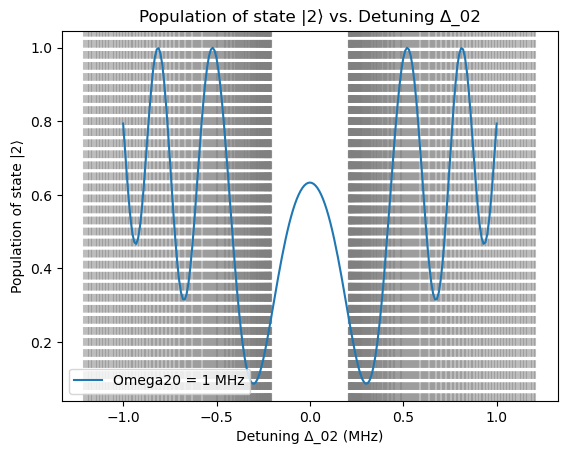

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Define the Hamiltonian for the 2-state system (excluding state 1)
def Hamil_2state(Delta02, Omega20):
    H = Qobj([[0, Omega20/2], [Omega20/2, Delta02]])  # 2-level system (|0⟩ and |2⟩)
    return H

# Parameters
Delta02 = 0.2  # Example detuning
Omega20 = 1  # Example coupling
delta_arr = np.linspace(-1, 1, 201)  # Range of detunings
t = np.linspace(1, 40, 100)  # Time evolution for solving Schrödinger equation
e_ops = [fock_dm(2, 0), fock_dm(2, 1)]  # Observables (state populations)

# Initialize plot
fig, ax = plt.subplots()

# Solve for population of |2⟩
results = []
dressed_energy = []

for delta in delta_arr:
    # Solve Schrödinger equation for population
    result = sesolve(Hamil_2state(delta, Omega20), fock(2, 0), t, e_ops)
    results.append(result.expect[0][-1])

    # Compute dressed state energies from eigenvalues of the reduced Hamiltonian
    En = Hamil_2state(delta, Omega20).eigenenergies()
    dressed_energy.append(En)  # Store eigenvalues

# Add vertical lines for the dressed state energies
for En in dressed_energy:
    ax.axvline(En[0], color='gray', linestyle='--', alpha=0.5)
    ax.axvline(En[1], color='gray', linestyle='--', alpha=0.5)

# Plot results
ax.plot(delta_arr, results, label=f"Omega20 = {Omega20} MHz")
ax.set_xlabel('Detuning Δ_02 (MHz)')
ax.set_ylabel('Population of state |2⟩')
ax.set_title('Population of state |2⟩ vs. Detuning Δ_02')
ax.legend()
plt.show()
